## SVM

### Importing All Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

### Loading The Dataset

In [3]:
# Load your dataset (replace "pd_speech_features.csv" with your actual file)
data = pd.read_csv("pd_speech_features.csv")
X = data.drop(columns=['class', 'id'])
y = data['class']

### Applying Scaling

In [4]:
# Scale the input data to the range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Applying Feature SElection

In [5]:
# Feature selection using ANOVA F-value
k = 300
anova_selector = SelectKBest(f_classif, k=k)
X_selected = anova_selector.fit_transform(X_scaled, y)


### Initialising SVM Classifier

In [6]:

# Set up k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the classifier (SVM as an example)
clf = SVC( C=1.0,           # Regularization parameter. Controls the trade-off between maximizing the margin and minimizing the classification error.
    kernel='poly',    # Kernel function: 'linear', 'poly', 'rbf' (Gaussian), 'sigmoid', etc.
    gamma='scale',   # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'. 'scale' uses 1 / (n_features * X.var()) as the default value.
    degree=3,        # Degree of the polynomial kernel function ('poly'). Ignored by other kernels.
    coef0=0.0,       # Independent term in kernel function. Used in 'poly' and 'sigmoid'.
    shrinking=True,  # Whether to use the shrinking heuristic. Can speed up training for large datasets.
    probability=False,  # Whether to enable probability estimates. Use for probability calibration.
    tol=1e-3,        # Tolerance for stopping criterion.
    class_weight=None,  # Weights associated with classes. Useful for unbalanced datasets.
    random_state=None,  # Seed for random number generator.
    verbose=False ) # Seed for random number generator


### Applying K-Fold Cross Validation

Average Accuracy: 0.8664255838271175
Average Precision: 0.9521397739300786
Average Recall: 0.8652812895069533
Average F1 Score: 0.9060183500616354


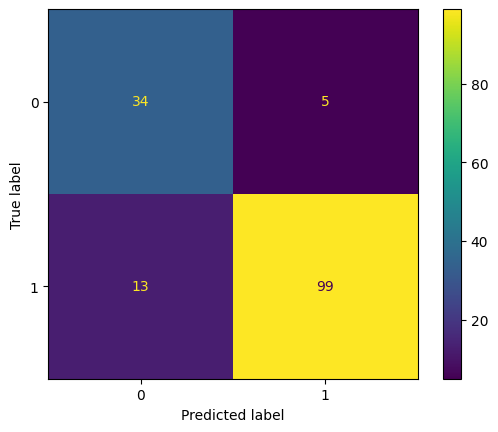

In [7]:

# Perform k-fold cross-validation
accuracies = []
precisions, recalls, f1_scores = [], [], [] 
for train_index, test_index in kf.split(X_selected, y):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply SMOTE only to the training data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Train the classifier
    clf.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_preds = clf.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)

    # Store metrics
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Print average accuracy across folds
average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)
average_f1 = np.mean(f1_scores)

print("Average Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)
print(ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = y_preds))
    
